In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Cargar el conjunto de datos
penguins = sns.load_dataset("penguins")

In [ ]:
# Ejercicio 1: Análisis exploratorio y estadístico
# Visualizar las primeras filas
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [ ]:
# Identificar los valores nulos
print(penguins.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [ ]:
# Imputar valores nulos (usamos la mediana en este caso)
penguins.fillna({'bill_length_mm': penguins['bill_length_mm'].mean()}, inplace=True)
penguins.fillna({'bill_depth_mm' :penguins['bill_depth_mm'].mean()}, inplace=True)
penguins.fillna({'flipper_length_mm': penguins['flipper_length_mm'].mean()}, inplace=True)
penguins.fillna({'body_mass_g': penguins['body_mass_g'].mean()}, inplace=True)
penguins.fillna({'sex': penguins['sex'].mode()[0]}, inplace=True)

print(penguins.isnull().sum())

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [ ]:
# Estadisticas básicas
print(penguins.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      344.000000     344.000000         344.000000   344.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.443643       1.969027          14.020657   799.613058
min         32.100000      13.100000         172.000000  2700.000000
25%         39.275000      15.600000         190.000000  3550.000000
50%         44.250000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


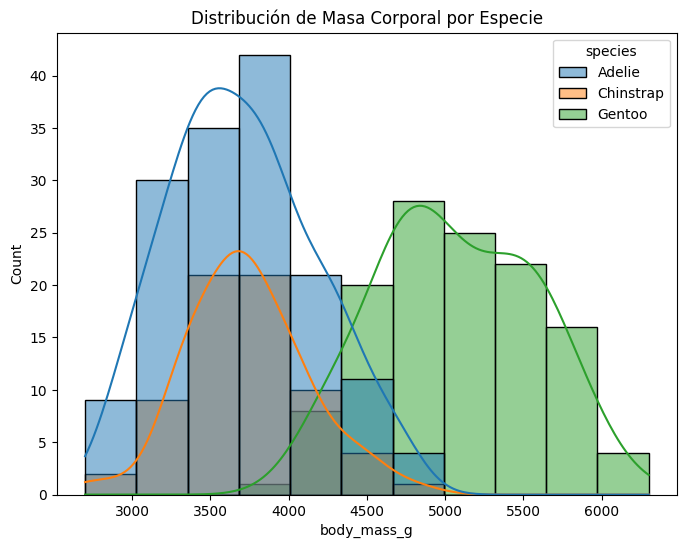

In [ ]:
# Visualizar la distribución de la masa corporal por especie
plt.figure(figsize=(8, 6))
sns.histplot(x='body_mass_g', hue = 'species', data=penguins, kde=True)
plt.title('Distribución de Masa Corporal por Especie')
plt.show()

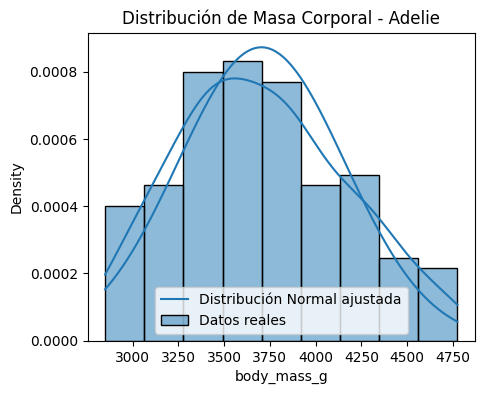

Adelie - Estadística de Shapiro: 0.9811569901684419, p-valor: 0.035403450164994056 


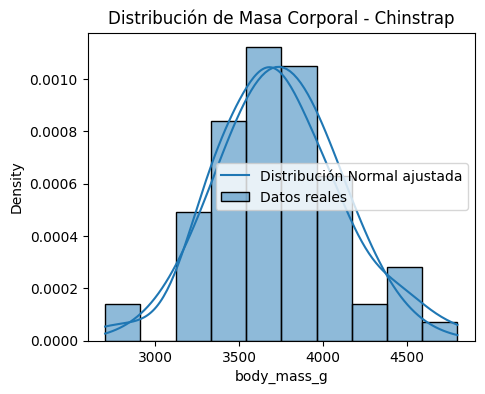

Chinstrap - Estadística de Shapiro: 0.984493761674102, p-valor: 0.5605082387697975 


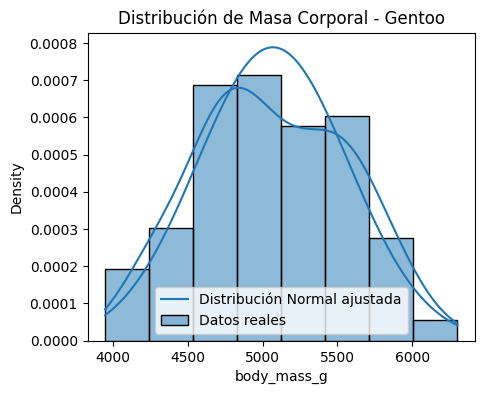

Gentoo - Estadística de Shapiro: 0.9853114269081487, p-valor: 0.20077040978681737 


In [ ]:
# Ejercicio 2: Distribución de probabilidad
# Ajustar distribución normal a la masa corporal
for especie in penguins['species'].unique():
    data = penguins[penguins['species'] == especie]['body_mass_g'].dropna()

    mean, std = norm.fit(data)

    plt.figure(figsize=(5, 4))
    sns.histplot(data, kde=True, stat='density', label='Datos reales')
    x = np.linspace(data.min(), data.max(), 100)

    plt.plot(x, norm.pdf(x,mean,std), label='Distribución Normal ajustada')
    plt.title(f'Distribución de Masa Corporal - {especie}')

    plt.legend()
    plt.show()

    # Prueba de normalidad
    stat, p = shapiro(data)
    print(f'{especie} - Estadística de Shapiro: {stat}, p-valor: {p} ')


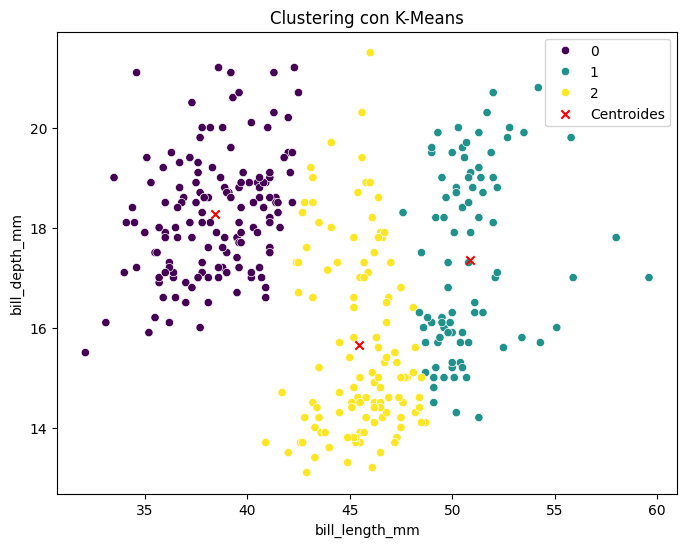

In [ ]:
# Ejercicio 3: Clustering con K-Means
# Selección de variables y eliminación de nulos
x = penguins[['bill_length_mm', 'bill_depth_mm']].dropna()

# Aplicar K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
penguins['clusters'] = kmeans.fit_predict(x)

# Visualizar  clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='clusters', palette = 'viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', label='Centroides', marker='x')
plt.title('Clustering con K-Means')
plt.legend()
plt.show()


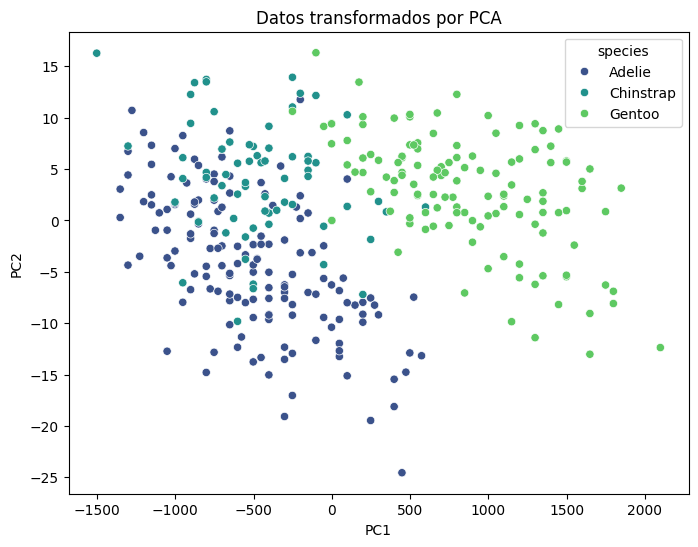

In [ ]:
# Reducción de dimensionalidad con PCA

# selección de las variables numéricas
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X_nums = penguins[num_cols].dropna()

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_nums)

# Crear el DataFrame con componentes principales
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = penguins.dropna(subset=num_cols)['species'].values

# Visualizar datos transformados
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species', palette='viridis')
plt.title('Datos transformados por PCA')
plt.show()

